C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

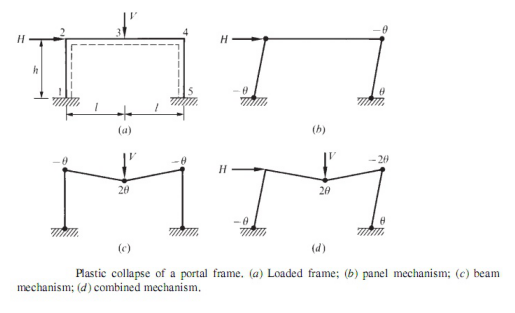

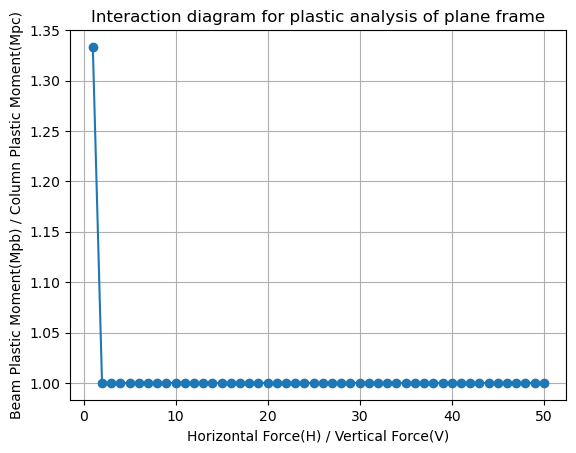

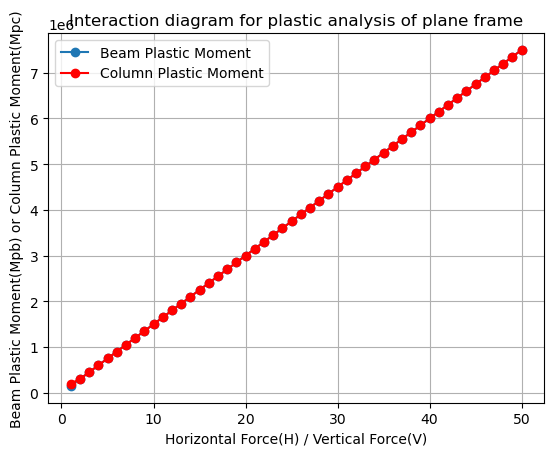

In [1]:
"""
%***********************************************************%
%              >> IN THE NAME OF ALLAH <<                   %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                          Vertical Force                   %
%                                 |                         %
%                                 V                         %
%        Horizontal Force->|************|   -               %
%                          |     Mpb    |   |               %
%                          |Mpc      Mpc|   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |--- 2L -----|                   %
%***********************************************************%
"""
import numpy as np
from scipy.optimize import linprog
import time

h = 6000  # Height of column
L = 4000  # Length of half beam
V = 100   # Vertical Force
n = 50    # number of Plastic moment

# In the example Plastic Moment of beam (Mpb) and Plastic Moment of column (Mpc) and we have at least 6 mechanisms
# by linear Programming Calculate the Horizontal Force(H) and Vertical Force(V)

starttime = time.time()
HV = []
Mpbb = []
Mpcc = []
Mpa = []
for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H = i * V
    f = [2 * h, L]
    
    #   Mpb Mpc
    A = -np.array([[0, 4],
                   [2, 2],
                   [2, 2],
                   [4, 0],
                   [4, 2],
                   [2, 4]])
    
    b = -np.array([V * L,
                   V * L,
                   H * h,
                   H * h,
                   H * h + V * L,
                   H * h + V * L])
    
    lb = [0, 0]
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    
    Mpb = res.x[0]
    Mpc = res.x[1]
    HVi = H / V
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp = Mpc / Mpb
    Mpa.append(Mp)
    

Plastic_Moment_HV = np.column_stack((Mpa, HV))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# Imaging

plt.figure(1)
IMAGE = mpimg.imread('PLASTICanalysisOFframe1.jpg')
plt.imshow(IMAGE)
plt.axis('image')
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.grid(True)

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid(True)

print('--------------------')
totaltime = time.process_time() - starttime
print(f'\nTotal time (s)= {totaltime:7.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

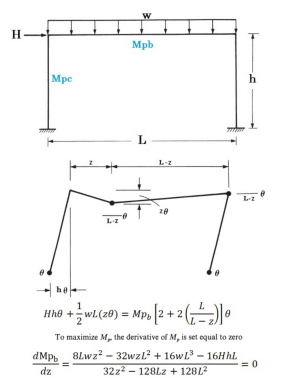

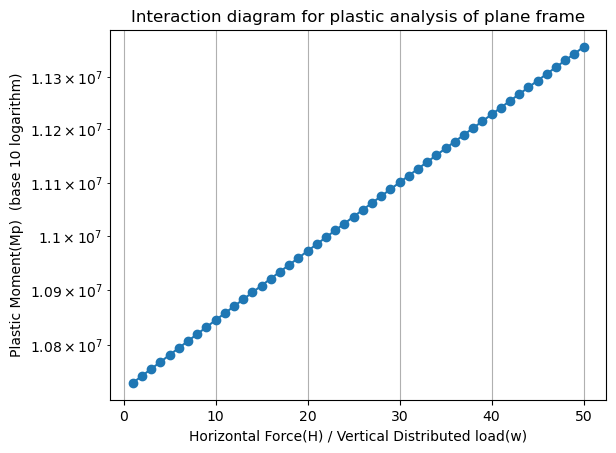

In [2]:
"""
%***********************************************************%
%              >> IN THE NAME OF GOD <<                     %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                     Vertical Distributed Load             %
%                                 w                         %
%                          ||||||||||||||                   %
%        Horizontal Force->|************|   -               %
%                          |     Mp     |   |               %
%                          |Mp       Mp |   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |---- L -----|                   %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

h = 6000  # Height of column
L = 4000  # Length of half beam
w = 10    # Vertical Distributed load(w)
n = 50    # number of Plastic moment

# Start time
starttime = time.time()
Hw = []
Mpa = []

for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H = i * w
    z1 = (3 * L * w + (3 * L**2 * w**2 + 4 * H * h * w)**0.5) / (2 * w)
    z2 = (3 * L * w - (3 * L**2 * w**2 + 4 * H * h * w)**0.5) / (2 * w)
    z = min(z1, z2)
    Mp = (H * h + 0.5 * w * L * z) / (2 + (L / (L - z)))
    Hwi = H / w
    Hw.append(Hwi)
    Mpa.append(Mp)

Plastic_Moment_Hw = np.array(Mpa), np.array(Hw)

# Imaging
plt.figure(1)
IMAGE = Image.open('PLASTICanalysisOFframe2.jpg')
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.semilogy(Hw, Mpa, '-o')
plt.grid(True)
plt.xlabel('Horizontal Force(H) / Vertical Distributed load(w)')
plt.ylabel('Plastic Moment(Mp)  (base 10 logarithm)')
plt.title('Interaction diagram for plastic analysis of plane frame')

# Print time of computation
print('--------------------')
totaltime = time.time() - starttime
print(f'\nTotal time (s)= {totaltime:.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

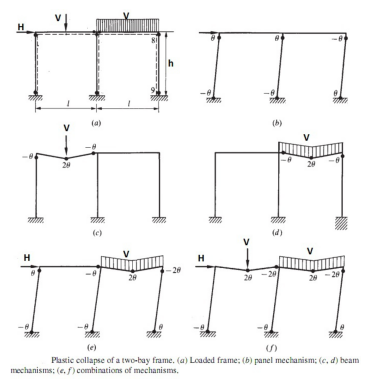

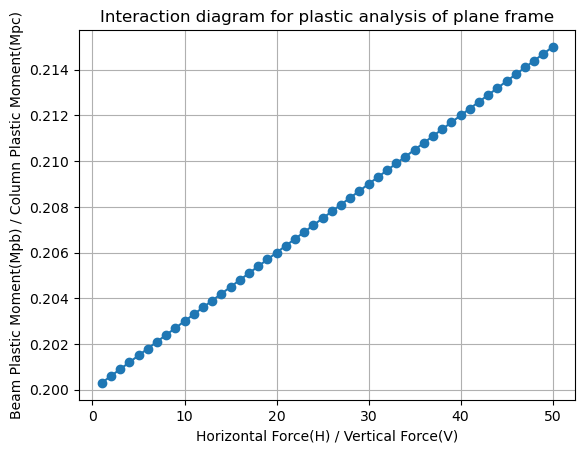

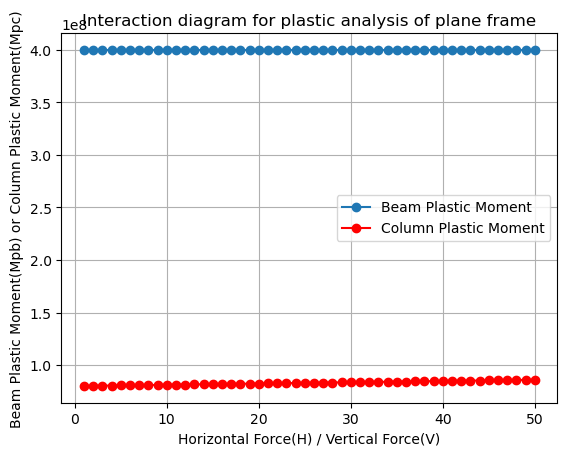

In [3]:
"""
%***********************************************************%
%              >> IN THE NAME OF GOD <<                     %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                Vertical Force  Vertical Distributed Force %
%                          |            w                   %
%                          V     ||||||||||||||             %
% Horizontal Force->|************|************|   -         %
%                   |     Mpb    |    Mpb     |   |         %
%                   |Mpc      Mpc|         Mpc|   h         %
%                   |            |            |   |         %
%                   =            =            =   -         %
%                   |---  L -----|---  L -----|             %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h = 6000  # Height of column
L = 4000  # Length of half beam
V = 100   # Vertical Force
n = 50    # number of Plastic moment

# In the example Plastic Moment of beam (Mpb) and Plastic Moment of column (Mpc) and we have at least 5 mechanisms
# by linear Programming Calculate the Horizontal Force(H) and Vertical Force(V)

# monitor cpu time
starttime = time.process_time()
HV = []
Mpbb = []
Mpcc = []
Mpa = []

for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H = i * V
    f = [3 * h, 2 * L]
    
    A = -np.array([[0, 6],
                   [4, 0],
                   [4, 0],
                   [3, 5],
                   [6, 4]])
    
    b = -np.array([H * h,
                   V * L,
                   V * L ** 2,
                   H * h + V * L ** 2,
                   H * h + V * L + V * L ** 2])
    
    lb = [0, 0]
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    
    Mpb = res.x[0]
    Mpc = res.x[1]
    HVi = H / V
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp = Mpc / Mpb
    Mpa.append(Mp)
    

Plastic_Moment_HV = np.column_stack((Mpa, HV))

# imaging
IMAGE = Image.open('PLASTICanalysisOFframe3.jpg')
plt.figure(1)
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.grid(True)
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid(True)

# print time of computation
print('--------------------')
totaltime = time.process_time() - starttime
print(f'\nTotal time (s)= {totaltime:7.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

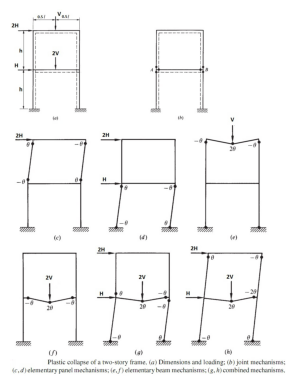

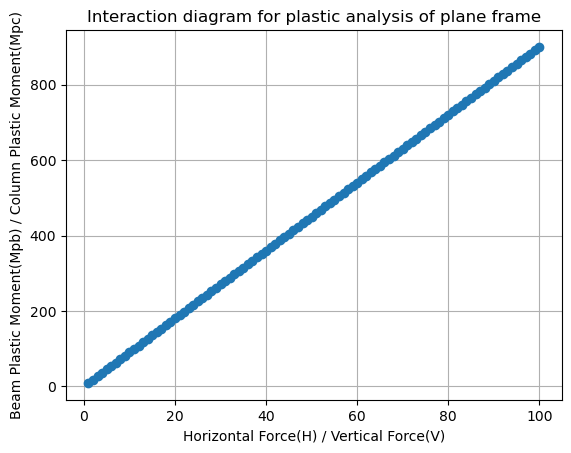

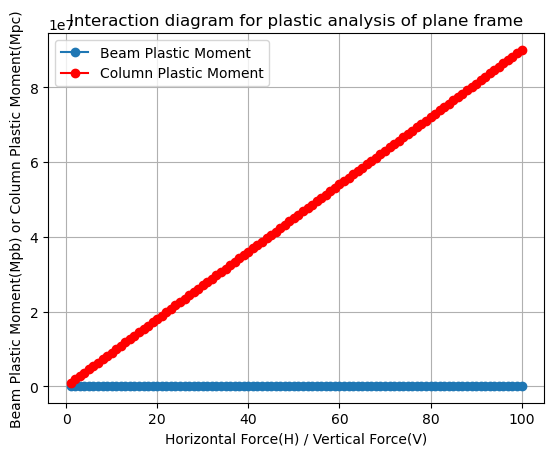

In [4]:
"""
%***********************************************************%
%                >> IN THE NAME OF GOD <<                   %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                                 2V                        %
%                                 |                         %
%                     2H ->|************|   -               %
%                          |     Mpb    |   |               %
%                          |Mpc   V  Mpc|   h               %
%                          |      |     |   |               %
%                      H ->|************|   -               %
%                          |     Mpb    |   |               %
%                          |Mpc      Mpc|   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |--- 2L -----|                   %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h = 6000  # Height of column
L = 4000  # Length of half beam
V = 100   # Vertical Force
n = 100   # number of Plastic moment

# In the example Plastic Moment of beam (Mpb) and Plastic Moment of column (Mpc) and we have at least 6 mechanisms
# by linear Programming Calculate the Horizontal Force(H) and Vertical Force(V)

# monitor cpu time
starttime = time.time()
HV = []
Mpa = []
Mpbb = []
Mpcc = []

for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H = i * V
    f = [4 * h, 2 * L]
    
    #   Mpb Mpc
    A = -np.array([[0, 4],
                   [0, 4],
                   [4, 0],
                   [4, 0],
                   [3, 4],
                   [4, 4]])
    
    b = -np.array([2 * H * h,
                   3 * H * h,
                   V * L / 2,
                   V * L,
                   6 * H * h + V * L,
                   6 * H * h + V * L])
    
    lb = [0, 0]
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    
    Mpb = res.x[0]
    Mpc = res.x[1]
    HVi = H / V
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp = Mpc / Mpb
    Mpa.append(Mp)

Plastic_Moment_HV = np.column_stack((Mpa, HV))

# imaging
plt.figure(1)
IMAGE = Image.open('PLASTICanalysisOFframe4.jpg')
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.grid(True)
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid(True)

# print time of computation
print('--------------------')
totaltime = time.time() - starttime
print(f'\nTotal time (s)= {totaltime:.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

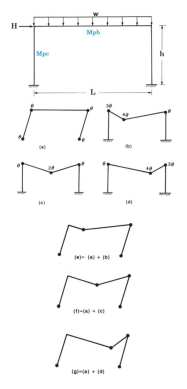

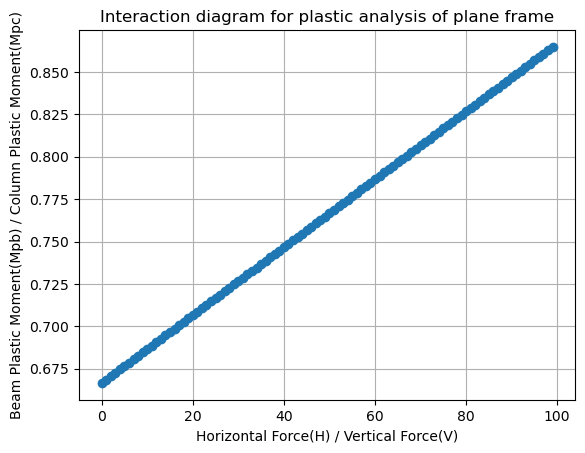

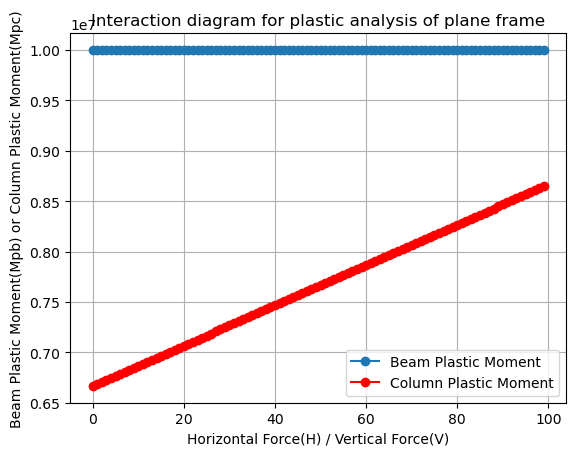

In [5]:
"""
%***********************************************************%
%                >> IN THE NAME OF GOD <<                   %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                     Vertical Distributed Load             %
%                                 w                         %
%                          ||||||||||||||                   %
%        Horizontal Force->|************|   -               %
%                          |     Mp     |   |               %
%                          |Mp       Mp |   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |---- L -----|                   %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h = 6000  # Height of column
L = 4000  # Length of half beam
w = 10  # Vertical Distributed load(w)
H = 10  # Horizontal Force(H)
n = 100  # number of Plastic moment

# Initialize arrays
HV = np.zeros(n)
Mpbb = np.zeros(n)
Mpcc = np.zeros(n)
Mpa = np.zeros(n)

# Monitor cpu time
starttime = time.process_time()

for i in range(n):
    print(f'                    Plastic Moment-{i+1}')
    H = i * w
    f = [2 * h, L]
    
    # Coefficients for the linear programming
    A = -np.array([[0, 4],
                   [8, 0],
                   [4, 0],
                   [8, 0],
                   [3, 3],
                   [2, 3],
                   [3, 3]])
    
    b = -np.array([H * h,
                   w * L**2 / 6,
                   w * L**2 / 4,
                   w * L**2 / 6,
                   H * h + w * L**2 / 6,
                   H * h + w * L**2 / 4,
                   H * h + w * L**2 / 6])
    
    lb = [0, 0]
    
    # Solve the linear programming problem
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    
    Mpb = res.x[0]
    Mpc = res.x[1]
    HVi = H / w
    HV[i] = HVi
    Mpbb[i] = Mpb
    Mpcc[i] = Mpc
    Mp = Mpc / Mpb
    Mpa[i] = Mp

Plastic_Moment_HV = np.column_stack((Mpa, HV))

# Imaging
IMAGE = Image.open('PLASTICanalysisOFframe5.jpg')
plt.figure(1)
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.grid()

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid()

# Print time of computation
print('--------------------')
totaltime = time.process_time() - starttime
print(f'\nTotal time (s)= {totaltime:7.4f} \n\n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

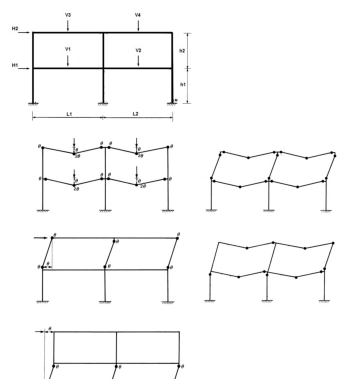

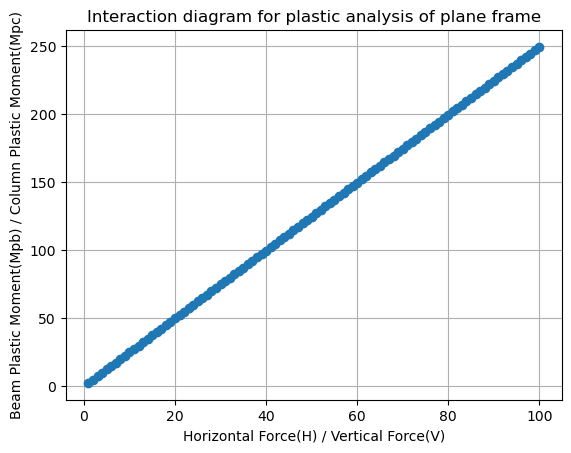

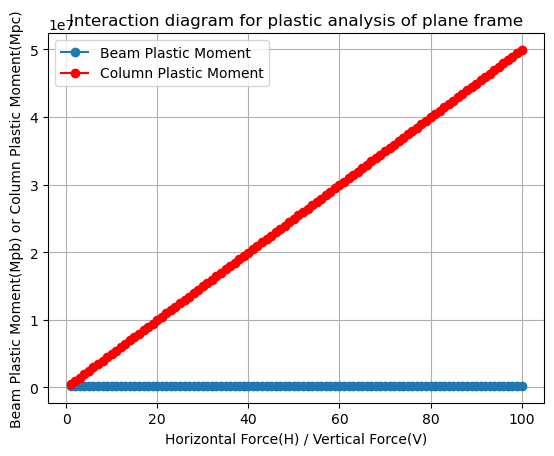

In [6]:
"""
%***********************************************************%
%                >> IN THE NAME OF GOD <<                   %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                                 V3          V4            %
%                                 |            |            %
%                     2H ->|************|************|   -  %
%                          |     Mpb    |     Mpb    |   |  %
%                          |Mpc   V1 Mpc|Mpc   V2 Mpc|   h2 %
%                          |      |     |      |     |   |  %
%                      H ->|************|************|   -  %
%                          |     Mpb    |     Mpb    |   |  %
%                          |Mpc      Mpc|Mpc      Mpc|   h1 %
%                          |            |            |   |  %
%                          =            =            =   -  %
%                          |--- L1 -----|--- L2 -----|      %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h1 = 6000  # Height of column1
h2 = 6000  # Height of column2
L1 = 4000  # Length of half beam1
L2 = 4000  # Length of half beam1
V1 = 100   # Vertical Force
n = 100    # number of Plastic moment

# In the example Plastic Moment of beam (Mpb) and Plastic Moment of column (Mpc) and we have at least 6 mechanisms
# by linear Programming Calculate the Horizontal Force(H) and Vertical Force(V)

HV = []
Mpa = []
Mpbb = []
Mpcc = []

starttime = time.time()
for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H1 = i * V1
    H2 = 2 * H1
    V2 = 2 * V1
    V3 = 3 * V1
    V4 = 4 * V1
    f = np.array([4 * h1, 2 * L1])
    
    A = -np.array([[4, 0],
                   [4, 0],
                   [4, 0],
                   [4, 0],
                   [0, 6],
                   [0, 6],
                   [12, 6],
                   [12, 4]])
    
    b = -np.array([V1 * 0.5 * L1,
                   V2 * 0.5 * L2,
                   V3 * 0.5 * L1,
                   V4 * 0.5 * L2,
                   H2 * h2,
                   (H1 + H2) * h2,
                   H1 * h1 + H2 * (h1 + h2) + V1 * 0.5 * L1 + V2 * 0.5 * L2 + V3 * 0.5 * L1 + V4 * 0.5 * L2,
                   H2 * h2 + V1 * 0.5 * L1 + V2 * 0.5 * L2 + V3 * 0.5 * L1 + V4 * 0.5 * L2])
    
    lb = np.zeros(2)
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    
    x = res.x
    Mpb = x[0]
    Mpc = x[1]
    HVi = H1 / V1
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp = Mpc / Mpb
    Mpa.append(Mp)

Plastic_Moment_HV = np.column_stack((Mpa, HV))

# Imaging
IMAGE = Image.open('PLASTICanalysisOFframe6.jpg')
plt.figure(1)
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.grid(True)
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid(True)

# Print time of computation
print('--------------------')
totaltime = time.time() - starttime
print(f'\nTotal time (s)= {totaltime:.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

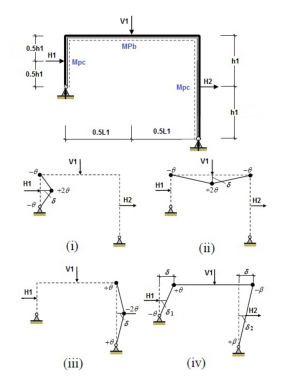

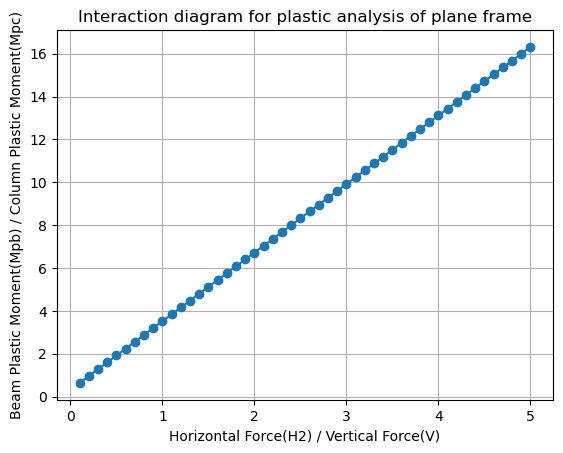

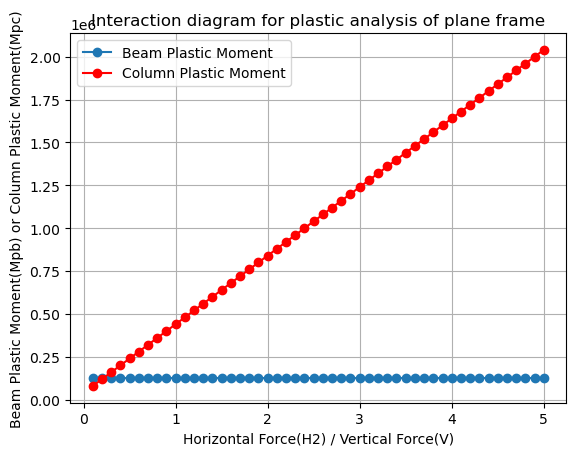

In [7]:
"""
%***********************************************************%
%              >> IN THE NAME OF GOD <<                     %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                          Vertical Force                   %
%                                 |                         %
%                                 V                         %
%        Horizontal Force->|************|   -               %
%                          |     Mpb    |   |               %
%                          |Mpc      Mpc|   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |--- L ------|                   %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h1 = 6000  # Height of column1
h2 = 12000  # Height of column2
L = 10000  # Length of half beam
H1 = 10  # Horizontal Force
V = 100  # Vertical Force
n = 50  # number of Plastic moment

HV = []
Mpa = []
Mpbb = []
Mpcc = []

# Start CPU time monitoring
import time
starttime = time.time()

for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H2 = i * H1
    f = [h1 + h2, L]
    
    # Mpb Mpc
    A = -np.array([[0, 3],
                   [4, 0],
                   [0, 3],
                   [0, 1.5]])
    
    b = -np.array([H1 * 0.5 * h1,
                   V * 0.5 * L,
                   H2 * 0.5 * h1,
                   H1 * h1 + H2 * h1])
    
    lb = [1000, 1000]  # lower bound
    ub = [25000, 25000]  # upper bound
    
    #res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], ub[0]))
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    X = res.x
    Mpb = X[0]
    Mpc = X[1]
    HVi = H2 / V
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp = Mpc / Mpb
    Mpa.append(Mp)
    
Plastic_Moment_HV = np.column_stack((Mpa, HV))

# Imaging
IMAGE = Image.open('PLASTICanalysisOFframe7.jpg')
plt.figure(1)
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.xlabel('Horizontal Force(H2) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.grid()

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H2) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid()

print('--------------------')
totaltime = time.time() - starttime
print(f'\nTotal time (s)= {totaltime:7.4f} \n')
print('--------------------')



                    Plastic Moment-1
                    Plastic Moment-2
                    Plastic Moment-3
                    Plastic Moment-4
                    Plastic Moment-5
                    Plastic Moment-6
                    Plastic Moment-7
                    Plastic Moment-8
                    Plastic Moment-9
                    Plastic Moment-10
                    Plastic Moment-11
                    Plastic Moment-12
                    Plastic Moment-13
                    Plastic Moment-14
                    Plastic Moment-15
                    Plastic Moment-16
                    Plastic Moment-17
                    Plastic Moment-18
                    Plastic Moment-19
                    Plastic Moment-20
                    Plastic Moment-21
                    Plastic Moment-22
                    Plastic Moment-23
                    Plastic Moment-24
                    Plastic Moment-25
                    Plastic Moment-26
                    P

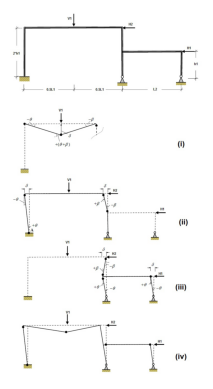

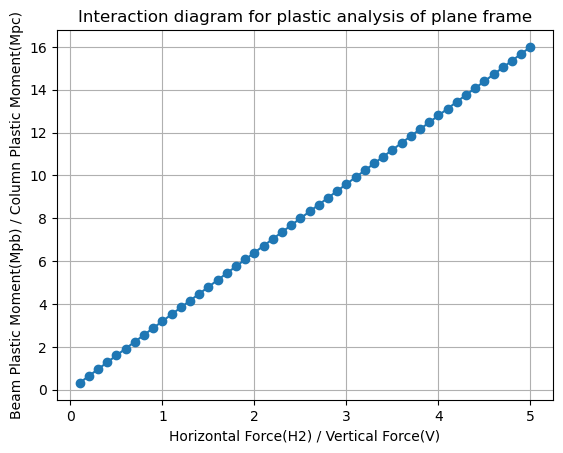

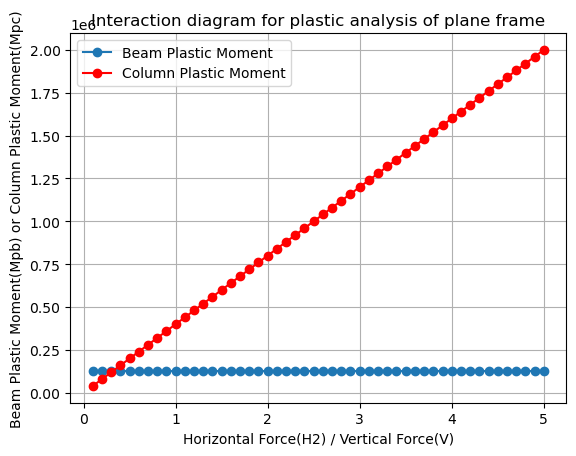

In [8]:
"""
%***********************************************************%
%              >> IN THE NAME OF GOD <<                     %
% Plastic Analysis of plane frame with Linear Programming   %
%-----------------------------------------------------------%
%     This program is written by salar delavar ghashghaei   %  
%          E-mail:salar.d.ghashghaei@gmail.com              %
%-----------------------------------------------------------%
%                          Vertical Force                   %
%                                 |                         %
%                                 V                         %
%        Horizontal Force->|************|   -               %
%                          |     Mpb    |   |               %
%                          |Mpc      Mpc|   h               %
%                          |            |   |               %
%                          =            =   -               %
%                          |---- L -----|                   %
%***********************************************************%
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from PIL import Image

h1 = 6000  # Height of column1
L1 = 10000  # Length of half beam1
L2 = 10000  # Length of half beam2
H1 = 10  # Horizontal Force
V = 100  # Vertical Force
n = 50  # number of Plastic moment

# Initialize lists to store results
HV = []
Mp = []
Mpbb = []
Mpcc = []
Mpa = []

# Start CPU time monitoring
import time
starttime = time.time()

for i in range(1, n + 1):
    print(f'                    Plastic Moment-{i}')
    H2 = i * H1
    f = np.array([h1, L1])
    
    # Coefficients for the inequalities
    A = -np.array([[4, 0],
                   [0, 6],
                   [0, 4],
                   [3, 1.5]])
    b = -np.array([V * 0.5 * L1,
                   H2 * 4 * h1,
                   H1 * h1 + H2 * h1,
                   H1 * h1 + H2 * h1])
    
    lb = [1000, 1000]  # lower bound
    ub = [25000, 25000]  # upper bound
    
    # Solve the linear programming problem
    #res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], ub[0]))
    res = linprog(f, A_ub=A, b_ub=b, bounds=(lb[0], None))
    X = res.x
    Mpb = X[0]
    Mpc = X[1]
    HVi = H2 / V
    HV.append(HVi)
    Mpbb.append(Mpb)
    Mpcc.append(Mpc)
    Mp_value = Mpc / Mpb
    Mpa.append(Mp_value)
    

Plastic_Moment_HV = np.column_stack((Mpa, HV))

# Imaging
plt.figure(1)
IMAGE = Image.open('PLASTICanalysisOFframe8.jpg')
plt.imshow(IMAGE)
plt.axis('off')

# Plot
plt.figure(2)
plt.plot(HV, Mpa, '-o')
plt.xlabel('Horizontal Force(H2) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) / Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.grid()

plt.figure(3)
plt.plot(HV, Mpbb, '-o', label='Beam Plastic Moment')
plt.plot(HV, Mpcc, 'r-o', label='Column Plastic Moment')
plt.xlabel('Horizontal Force(H2) / Vertical Force(V)')
plt.ylabel('Beam Plastic Moment(Mpb) or Column Plastic Moment(Mpc)')
plt.title('Interaction diagram for plastic analysis of plane frame')
plt.legend()
plt.grid()

print('--------------------')
totaltime = time.time() - starttime
print(f'\nTotal time (s)= {totaltime:.4f} \n')
print('--------------------')

